In [1]:
# Import necessary libraries
from keras.models import Sequential
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
dataset = mnist.load_data('mnist.npz')

In [3]:
train,test = dataset
len(train)

2

In [4]:
X_train, y_train = train
X_test, y_test = test

In [5]:
len(X_train)


60000

In [6]:
len(X_test)

10000

In [7]:
X_train[0].shape


(28, 28)

In [8]:
#dimension of the first sample
X_train[0].ndim

2

In [9]:
img = X_train[1]

In [10]:
X_train = X_train.reshape(-1,28*28)
#X_train = X_train.reshape(-1, 1, 28*28)
X_train.shape

(60000, 784)

In [11]:
X_test = X_test.reshape(-1, 28*28)
X_test.shape

(10000, 784)

In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
y_train = to_categorical(y_train)


In [14]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [15]:
model=Sequential()

model.add( Dense(units = 512 , input_shape = (784,) , activation = 'relu' ))
model.add( Dense(units = 256 , activation = 'relu' ))
model.add( Dense(units = 128 , activation = 'relu' ))
model.add( Dense(units = 64 , activation = 'relu' ))
model.add( Dense(units = 10 , activation = 'softmax' ))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 575050 (2.19 MB)
Trainable params: 575050 (2.19 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile(
    optimizer='adam',
    
    loss='categorical_crossentropy',
    
    metrics=['accuracy']
)

In [18]:

history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 30s 17ms/step - loss: 0.7287 - accuracy: 0.8917 - val_loss: 0.2084 - val_accuracy: 0.9438
Epoch 2/10
1500/1500 [==============================] - 29s 19ms/step - loss: 0.1821 - accuracy: 0.9483 - val_loss: 0.1854 - val_accuracy: 0.9517
Epoch 3/10
1500/1500 [==============================] - 24s 16ms/step - loss: 0.1471 - accuracy: 0.9587 - val_loss: 0.1844 - val_accuracy: 0.9500
Epoch 4/10
1500/1500 [==============================] - 24s 16ms/step - loss: 0.1200 - accuracy: 0.9656 - val_loss: 0.1457 - val_accuracy: 0.9628
Epoch 5/10
1500/1500 [==============================] - 23s 15ms/step - loss: 0.1095 - accuracy: 0.9693 - val_loss: 0.1305 - val_accuracy: 0.9663
Epoch 6/10
1500/1500 [==============================] - 24s 16ms/step - loss: 0.0927 - accuracy: 0.9743 - val_loss: 0.1375 - val_accuracy: 0.9653
Epoch 7/10
1500/1500 [==============================] - 24s 16ms/step - loss: 0.0901 - accuracy: 0.9758 - val_loss: 0.1257 -

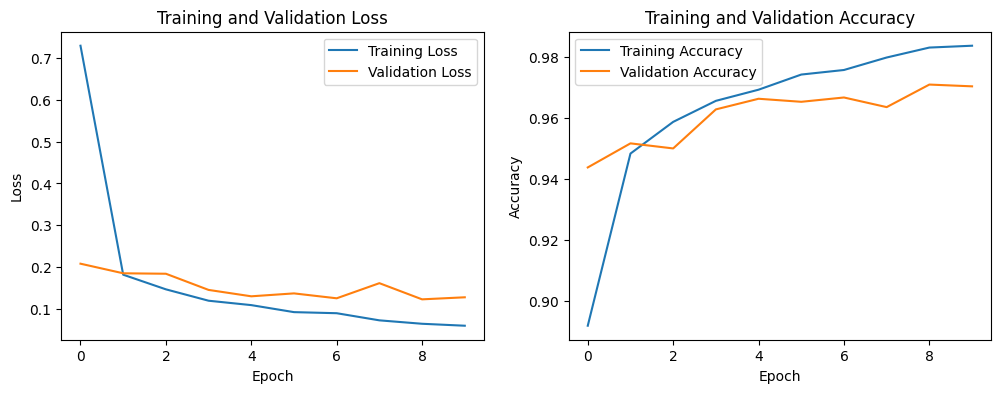

In [19]:
# Plot training history (loss and accuracy)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

In [20]:
# Select multiple sample images from the test set (e.g., the first 10 images)
sample_images = X_test

In [21]:
# Use the trained model to make predictions on the selected images
predictions = model.predict(sample_images)

313/313 [==============================] - 2s 4ms/step


In [22]:
# Print the predictions
print(predictions)

[[7.67838793e-10 9.78482504e-08 2.48245708e-08 ... 9.99996901e-01
  3.89044796e-09 2.70722876e-06]
 [4.17309289e-15 1.59935704e-13 1.00000000e+00 ... 2.49768279e-11
  2.54945022e-17 5.70145321e-18]
 [1.06111493e-08 1.00000000e+00 6.06820288e-11 ... 9.32923044e-11
  9.37694278e-09 2.22799179e-17]
 ...
 [1.36407642e-16 4.84133412e-15 1.57612068e-09 ... 1.16288703e-07
  3.30449481e-08 1.10856995e-08]
 [6.12751244e-17 1.35393984e-26 2.72620862e-20 ... 1.56294850e-17
  3.24890174e-17 1.29397703e-16]
 [1.73713464e-14 6.48035922e-12 5.18332495e-15 ... 3.36896360e-34
  2.24199880e-14 2.14626225e-25]]


In [23]:
# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

In [24]:
# Print the predicted labels
print("Predicted Labels:", predicted_labels)

Predicted Labels: [7 2 1 ... 4 5 6]


In [25]:
# Generate a confusion matrix and classification report
y_true = y_test
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
confusion = confusion_matrix(y_true, y_pred_labels)
classification_report_str = classification_report(y_true, y_pred_labels)

print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_report_str)

313/313 [==============================] - 2s 6ms/step
Confusion Matrix:
 [[ 974    0    1    1    0    1    1    1    1    0]
 [   0 1110    5    5    1    1    1    3    9    0]
 [   4    1  999   10    0    0    1   11    6    0]
 [   0    0    5  988    0    7    0    4    2    4]
 [   1    1    2    0  941    0    5    7    1   24]
 [   6    0    0   18    2  861    2    1    1    1]
 [  14    2    1    1    5    5  925    1    3    1]
 [   1    0    9    7    0    1    0 1006    0    4]
 [   6    0    1    6    4    7    1    5  937    7]
 [   3    0    0    4    9    4    0   15    4  970]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       1.00      0.98      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.95      0.98      0.96      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97   

313/313 [==============================] - 2s 5ms/step


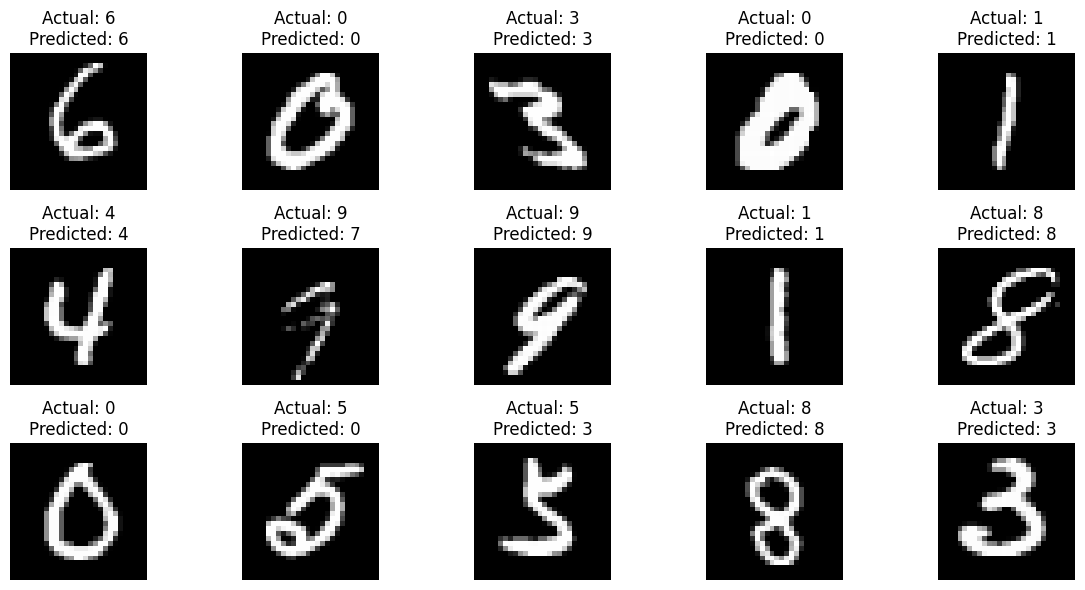

In [26]:
# Use the trained model to make predictions on the test set
predictions = model.predict(X_test)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Select some random test samples (e.g., the first 15)
num_samples_to_display = 15
sample_indices = np.random.choice(len(X_test), num_samples_to_display, replace=False)

# Create a figure to display the comparison
plt.figure(figsize=(12, 6))

for i, sample_index in enumerate(sample_indices):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[sample_index].reshape(28, 28), cmap='gray')
    plt.title(f"Actual: {y_test[sample_index]}\nPredicted: {predicted_labels[sample_index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()